# Directional Forecasting in Cryptocurrencies
## Final Submission Document for The Dreamers
by adithya

this file goes through a few different methods to try to predict or forecast the direction/ trend of cryptocurrencies
the target here is 'target' which is a binary variable with 2 possible values <br>
-> 0 - the price of the crypto will remain the same or decrease <br>
-> 1 - the price of the crypto will increase

each row has features that correspond to the status of the cryptocurrency for that minute, and the target is if it will go up or down the next minute 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('train.csv')
df

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2122433,1652817240,0.43060,0.43060,0.42990,0.43040,136274.00,58630.162800,144.0,54216.00,23325.927700,1.0
2122434,1652817300,0.43030,0.43070,0.43030,0.43050,104478.00,44967.837600,99.0,52232.00,22484.030400,1.0
2122435,1652817360,0.43050,0.43120,0.43050,0.43090,212396.00,91526.987200,177.0,108324.00,46673.061600,0.0
2122436,1652817420,0.43110,0.43110,0.43040,0.43060,131047.00,56443.003800,107.0,32713.00,14097.148900,0.0


### Here we create new features 'next_close' ,'prev_close' which we go through shortly

In [33]:
df['next_close']=df['close'].shift(-1)# here we can see that the last value of 'next_close' is NaN this is because the dataset does not contain the next/ future value
df['prev_close']=df['close'].shift(1) # similarly the first value of 'prev_close' is also Nan as we do not know what came before it
df[['prev_close','close','next_close','target']]

,prev_close,close,next_close,target
0,NaN,0.90130,0.90195,1.0
1,0.90130,0.90195,0.90139,0.0
2,0.90195,0.90139,0.90139,0.0
3,0.90139,0.90139,0.90130,0.0
4,0.90139,0.90130,0.90001,0.0
...,...,...,...,...
2122433,0.43060,0.43040,0.43050,1.0
2122434,0.43040,0.43050,0.43090,1.0
2122435,0.43050,0.43090,0.43060,0.0
2122436,0.43090,0.43060,0.43010,0.0


<Axes: >

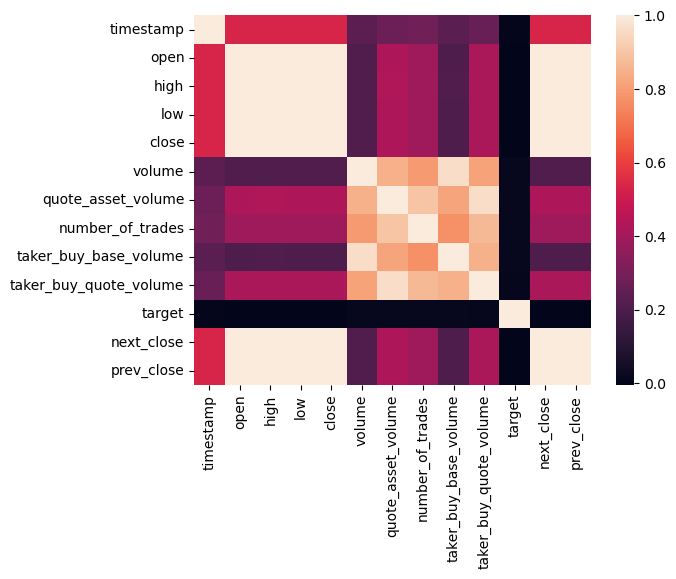

In [36]:
sns.heatmap(df.corr())

#### We see that the features 'close' and 'next_close' have really low correlation with the target, this should mean that they have little importance in predicting the target , this is false as we see below their Significance 

In [37]:
print('correlation of target and other features')
df.corr()['target']

correlation of target and other features


timestamp                 0.005468
open                     -0.004030
high                     -0.003995
low                      -0.004087
close                    -0.004100
volume                    0.015103
quote_asset_volume        0.012075
number_of_trades          0.014019
taker_buy_base_volume     0.013395
taker_buy_quote_volume    0.010717
target                    1.000000
next_close               -0.002394
prev_close               -0.004015
Name: target, dtype: float64

#### we see that by just comparing the two features 'close' and 'next_close' we can easily classify the dataset, so any models which contain this is bound to produce better results,

In [38]:
higher_next_close=df['close']<df['next_close']
df[higher_next_close]['target'].value_counts(normalize=True)

target
1.0    1.0
Name: proportion, dtype: float64

In [39]:
lower_next_close=df['close']>=df['next_close']
df[lower_next_close]['target'].value_counts(normalize=True)

target
0.0    1.0
Name: proportion, dtype: float64

#### from the various models, feature combinations, extracted features that i tried i found that models with 'next_close' ,'close' give the best results,

so we build a decision tree

In [2]:
df = pd.read_csv('train.csv')
df['next_close'] = df['close'].shift(-1)  #( here we create a new feature called 'next_close' this gives like a sneak peak into the future, not applicable in realworld scenarios                                            
df.dropna(inplace=True)

In [3]:
from sklearn.model_selection import train_test_split
x1=df.drop(['target'],axis=1)
y1=df['target']
Xtrain,Xtest,ytrain,ytest=train_test_split(x1,y1,test_size=40,shuffle=False)

In [4]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100).fit(Xtrain,ytrain)

In [5]:
ypred=rfc.predict(Xtest)

In [6]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(ytest,ypred))
print(f1_score(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87        20
         1.0       1.00      0.70      0.82        20

    accuracy                           0.85        40
   macro avg       0.88      0.85      0.85        40
weighted avg       0.88      0.85      0.85        40

0.8235294117647058


#### as we can see the model performs pretty well, but it did not necessarily give the best performance(F1 score), the actual best performance was 

In [7]:
df = pd.read_csv('train.csv')
df['next_close']=df['close'].shift(-1)
df.dropna(inplace=True)

In [9]:
df['new_target']=0
higher_close=df['close']<df['next_close']
df.loc[higher_close,'new_target']=1
#now to check their performance
print(classification_report(df['target'],df['new_target']))
print("f1 score : ",f1_score(df['target'],df['new_target']))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1112614
         1.0       1.00      1.00      1.00   1009823

    accuracy                           1.00   2122437
   macro avg       1.00      1.00      1.00   2122437
weighted avg       1.00      1.00      1.00   2122437

f1 score :  1.0


#### a similar partern also exists among the test dataset and upon submission of the result of the below code, it gave a f1-score of 1.0,<br>but as mentioned earlier it is not possible to implement and use models which rely on 'next_price' as it is the equivalent of knowing the future price,<br><br>in that case a model would not be required as demonstrated above that the best performance was not through a complex model but a simple if condition

models which don't use 'next_close' end up giving a performance of about 0.54 (macro f1) [random forest

In [27]:
dft=pd.read_csv('test.csv')
dft['target']=0

dft['lc']=dft['close'].shift(-1)
dft.loc[909616,'lc']=0.5143

f1=dft['close']<dft['lc']
dft.loc[f1,'target']=1

dft.set_index('row_id',inplace=True)
dft['target'].to_csv('submission_12.csv')

#### So our new goal is to predict or forecast the 'next_close' or closing price of next minute accurately,

I have also tried several types of models such as to try to predict the 'next_close' attribute through regression<br>

->  Xgboost based regression (mae of around 0.0010)<br>
->  auto regressive models (mse of around 0.220989015620083)<br>
->  Lstm/Gru/Rnn based models (mae of around  0.0013)<br>
->  prophet(mae 0.0007, mse)<br>

most models like arima,prophet were able to like replicate the general trends,but could not properly like capture the actual values so while compairing,<br>
that is the models seem to predict the big picture but not the finer details
  (please refer the document on the repo for more context)

#### So the problem is , despite a relatively low error, the predictions are not perfect and even if the model understands if the price should go up or down,<br>it is not certain of the magnitude by which it should go up or down<br> <br>this we can try to address this by getting model to predict both current close and next close, and compairing their magnitudes to guess 'target' value<br>But it won't be effective unless the models which are predicting both are somehow connected (which might be a little complicated)

#### this notebook focus on the first approach and to explore if having 2 independent models (we explore xgboost regression and prophet) forecast close and next close and find the target

In [61]:
#xgboost regression for forecasting next_close
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

df['next_close']=df['close'].shift(-1)
df.dropna(inplace=True)
X = df[['open', 'high', 'low', 'volume', 'quote_asset_volume', 'number_of_trades','close',
          'taker_buy_base_volume', 'taker_buy_quote_volume']]
y = df['next_close']
X_train=X
y_train=y

In [62]:
test=pd.read_csv('test.csv')
test['next_close']=test['close'].shift(-1)
test.loc[909616,'next_close']=0.5145

X_test=test[['open', 'high', 'low', 'volume', 'quote_asset_volume', 'number_of_trades','close',
          'taker_buy_base_volume', 'taker_buy_quote_volume']]
y_test=test['next_close']

In [63]:
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [64]:
xg_reg = xgb.XGBRegressor(objective='reg:absoluteerror', n_estimators=1000, learning_rate=0.15, max_depth=25)
xg_reg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=25, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:absoluteerror', ...)

In [65]:
y_pred_train = xg_reg.predict(X_train_scaled)
y_pred_test = xg_reg.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f'Train Mean Squared Error: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')

Train Mean Squared Error: 9.383236710007074e-06
Test Mean Squared Error: 2.220648753926105e-06


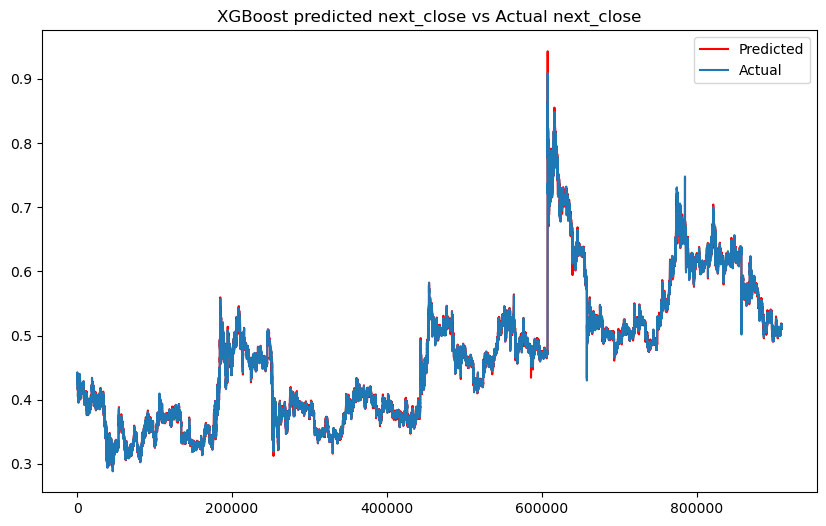

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred_test, label="Predicted", color="red")
plt.plot(y_test.values, label="Actual")
plt.legend()
plt.title("XGBoost predicted next_close vs Actual next_close")
plt.show()

In [46]:
#xgboost regression to forecast current close
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

df2 = pd.read_csv('train.csv')
X2= df2[['open', 'high', 'low', 'volume', 'quote_asset_volume', 'number_of_trades', 
          'taker_buy_base_volume', 'taker_buy_quote_volume']]
y2= df2['close']
X_train2=X2
y_train2=y2

In [47]:
test2=pd.read_csv('test.csv')
X_test2=test2[['open', 'high', 'low', 'volume', 'quote_asset_volume', 'number_of_trades', 
          'taker_buy_base_volume', 'taker_buy_quote_volume']]
y_test2=test2['close']

In [48]:
# Scaling features
scaler_X2 = MinMaxScaler()
X_train_scaled2 = scaler_X2.fit_transform(X_train2)
X_test_scaled2 = scaler_X2.transform(X_test2)

In [49]:
xg_reg2 = xgb.XGBRegressor(objective='reg:absoluteerror', n_estimators=1000, learning_rate=0.15, max_depth=25)
xg_reg2.fit(X_train_scaled2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=25, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:absoluteerror', ...)

In [50]:
y_pred_train2 = xg_reg.predict(X_train_scaled2)
y_pred_test2 = xg_reg.predict(X_test_scaled2)

train_mse2= mean_squared_error(y_train2, y_pred_train2)
test_mse2= mean_squared_error(y_test2, y_pred_test2)
print(f'Train Mean Squared Error: {train_mse2}')
print(f'Test Mean Squared Error: {test_mse2}')

Train Mean Squared Error: 9.129117141298542e-06
Test Mean Squared Error: 2.0485862547862927e-06


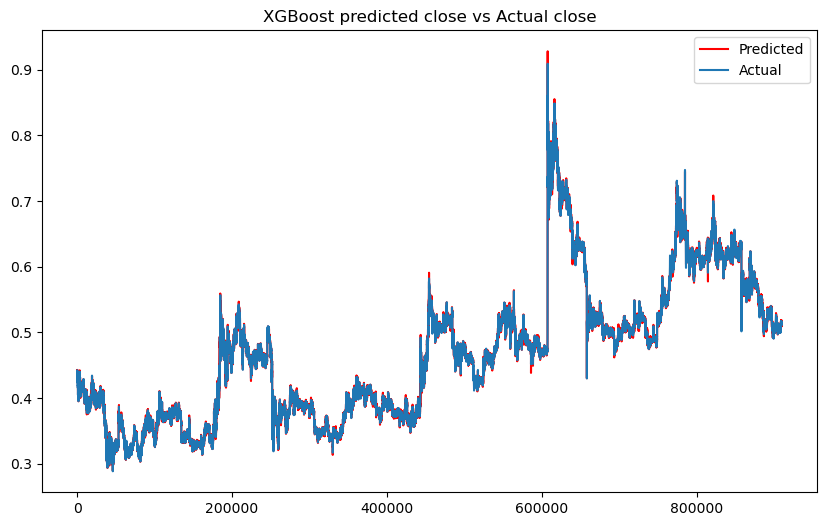

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred_test2, label="Predicted", color="red")
plt.plot(y_test2.values, label="Actual")
plt.legend()
plt.title("XGBoost predicted close vs Actual close")
plt.show()

#### We can see that their predictions values are slightly off but some trend can be observed, while their graphs show that the model understands the trends well

In [67]:
test['predicted_next_close']=y_pred_test
test['predicted_close']=y_pred_test2
test[['close','predicted_close','next_close','predicted_next_close']]

,close,predicted_close,next_close,predicted_next_close
0,0.4301,0.429588,0.4302,0.429656
1,0.4302,0.429266,0.4299,0.429581
2,0.4299,0.430342,0.4301,0.429743
3,0.4301,0.431421,0.4303,0.429666
4,0.4303,0.429542,0.4306,0.429574
...,...,...,...,...
909612,0.5143,0.516617,0.5143,0.516853
909613,0.5143,0.516615,0.5142,0.516819
909614,0.5142,0.516647,0.5143,0.516634
909615,0.5143,0.516623,0.5144,0.516007


In [94]:
test['target']=0
higher_close=test['predicted_close']<test['predicted_next_close']
test.loc[higher_close,'target']=1

#### we see that the performance is as good as a random model, maybe a connected model can have better prediction 

In [95]:
eval_data=pd.read_csv('expected_results.csv')
from sklearn.metrics import f1_score,classification_report
print(classification_report(eval_data['target'],test['target']))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57    527624
           1       0.42      0.44      0.43    381993

    accuracy                           0.51    909617
   macro avg       0.50      0.50      0.50    909617
weighted avg       0.51      0.51      0.51    909617



#### We try the Same with Prophet base Models

In [1]:
#prophet to predict next_close
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
df = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
df=df*1000
test=test*1000


Importing plotly failed. Interactive plots will not work.


In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])
df['next_close'] = df['close'].shift(-1)
df = df.dropna()

In [9]:
df_prophet = df[['timestamp', 'next_close', 'open', 'high', 'low', 'volume','quote_asset_volume','number_of_trades','taker_buy_base_volume','taker_buy_quote_volume']].rename(columns={'timestamp': 'ds', 'next_close': 'y'})
dft_prophet=test.drop(['row_id','close','timestamp'],axis=1)

train_df = df_prophet# we are training on whole dataset for optimal results, we are testing on the test dataset

In [4]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
df = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
df=df*1000
test=test*1000
# Load and prepare the dataset
df['timestamp'] = pd.to_datetime(df['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])
df['next_close'] = df['close'].shift(-1)
df = df.dropna()
model = Prophet()
model.add_regressor('open')
model.add_regressor('high')
model.add_regressor('low')
model.add_regressor('volume')
model.add_regressor('quote_asset_volume')
model.add_regressor('number_of_trades')
model.add_regressor('taker_buy_base_volume')
model.add_regressor('taker_buy_quote_volume')

In [5]:
model.fit(train_df)

20:24:30 - cmdstanpy - INFO - Chain [1] start processing
21:00:34 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
dft_prophet['ds']=test['timestamp']
future = dft_prophet[['ds','open', 'high', 'low', 'volume','quote_asset_volume','number_of_trades','taker_buy_base_volume','taker_buy_quote_volume']]
forecast = model.predict(future)

In [16]:
dft_prophet['predicted_next_close'] = forecast['yhat'].values

In [17]:
dft_prophet['close']=test['close']
dft_prophet['next_close']=test['close'].shift(-1)
dft_prophet.loc[909616,'next_close']=514.3

In [18]:
dft_prophet[['close','next_close','predicted_next_close']]

,close,next_close,predicted_next_close
0,430.1,430.2,430.382459
1,430.2,429.9,429.659417
2,429.9,430.1,429.486253
3,430.1,430.3,430.185974
4,430.3,430.6,430.542207
...,...,...,...
909612,514.3,514.3,514.140961
909613,514.3,514.2,514.050120
909614,514.2,514.3,514.106303
909615,514.3,514.4,514.173705


In [19]:
mae = mean_absolute_error(dft_prophet['next_close'], dft_prophet['predicted_next_close'])
rmse = np.sqrt(mean_squared_error(dft_prophet['next_close'], dft_prophet['predicted_next_close']))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.3409833871730547
Root Mean Squared Error (RMSE): 0.598292512744864


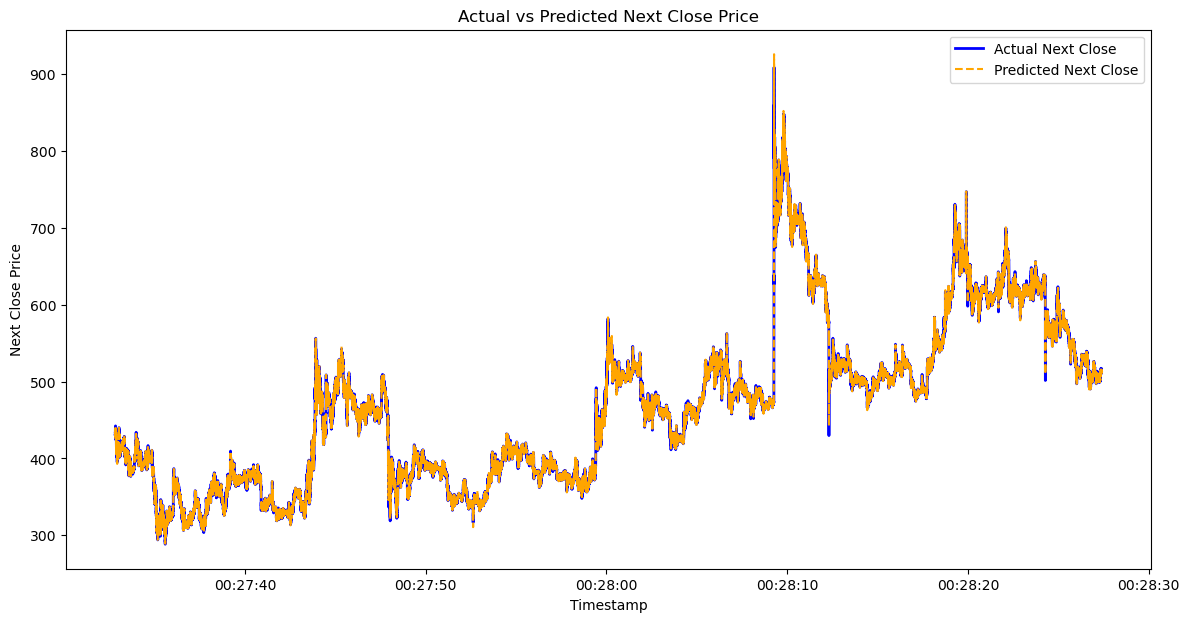

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(dft_prophet['ds'], dft_prophet['next_close'], label='Actual Next Close', color='blue', linewidth=2)
plt.plot(dft_prophet['ds'], dft_prophet['predicted_next_close'],label='Predicted Next Close', color='orange', linestyle='--')
plt.title('Actual vs Predicted Next Close Price')
plt.xlabel('Timestamp')
plt.ylabel('Next Close Price')
plt.legend()
plt.show()

In [24]:
dft_prophet.to_csv('prophet_predicted_next_close.csv')
#due to computing constraints i am saving results from this model before running another prophet model

#### We see the performance of model with only 'next_close' as it is the 'future' value, we see that despite the prediction vs actual graph being identical , the performance was not as good

In [26]:
#checking for performance with just predicted_next_close
dft_prophet['target']=0
higher_close=dft_prophet['close']<dft_prophet['predicted_next_close']
dft_prophet.loc[higher_close,'target']=1

eval_data=pd.read_csv('expected_results.csv')
from sklearn.metrics import f1_score,classification_report
print(classification_report(eval_data['target'],dft_prophet['target']))

              precision    recall  f1-score   support

           0       0.59      0.79      0.68    527624
           1       0.46      0.25      0.32    381993

    accuracy                           0.56    909617
   macro avg       0.53      0.52      0.50    909617
weighted avg       0.54      0.56      0.53    909617



In [ ]:
#prophet model for current close

In [37]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
df2= pd.read_csv('train.csv')
test2=pd.read_csv('test.csv')
df2=df2*1000
test2=test2*1000

In [38]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
test2['timestamp'] = pd.to_datetime(test2['timestamp'])

In [42]:
df_prophet2 = df2[['timestamp', 'close', 'open', 'high', 'low', 'volume','quote_asset_volume','number_of_trades','taker_buy_base_volume','taker_buy_quote_volume']].rename(columns={'timestamp': 'ds', 'close': 'y'})
dft_prophet2=test2.drop(['row_id','close','timestamp'],axis=1)

train_df2 = df_prophet2# we are training on whole dataset for optimal results, we are testing on the test dataset

In [43]:
model2 = Prophet()
model2.add_regressor('open')
model2.add_regressor('high')
model2.add_regressor('low')
model2.add_regressor('volume')
model2.add_regressor('quote_asset_volume')
model2.add_regressor('number_of_trades')
model2.add_regressor('taker_buy_base_volume')
model2.add_regressor('taker_buy_quote_volume')

In [44]:
model2.fit(train_df2)

23:05:30 - cmdstanpy - INFO - Chain [1] start processing
00:34:06 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
dft_prophet2['ds']=test2['timestamp']
future2 = dft_prophet2[['ds','open', 'high', 'low', 'volume','quote_asset_volume','number_of_trades','taker_buy_base_volume','taker_buy_quote_volume']]
forecast2 = model2.predict(future2)

In [48]:
dft_prophet2['predicted_close'] = forecast2['yhat'].values

In [49]:
dft_prophet2['close']=test2['close']
dft_prophet2[['close','predicted_close']]
mae = mean_absolute_error(dft_prophet2['close'], dft_prophet2['predicted_close'])
rmse = np.sqrt(mean_squared_error(dft_prophet2['close'],dft_prophet2['predicted_close']))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.1334928376199869
Root Mean Squared Error (RMSE): 0.22569312971846844


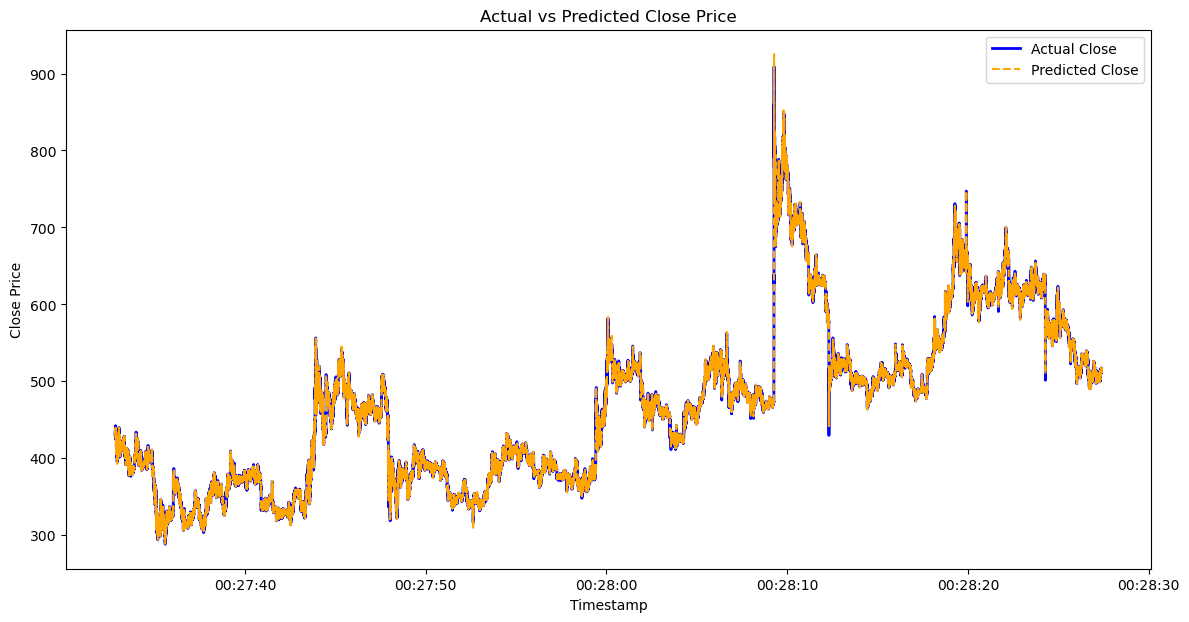

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(dft_prophet2['ds'], dft_prophet2['close'], label='Actual Close', color='blue', linewidth=2)
plt.plot(dft_prophet2['ds'], dft_prophet2['predicted_close'],label='Predicted Close', color='orange', linestyle='--')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.legend()

plt.show()

In [52]:
dft_prophet2['predicted_next_close']=dft_prophet['predicted_next_close']
dft_prophet2['next_close']=dft_prophet['next_close']
dft_prophet2[['close','predicted_close','next_close','predicted_next_close']]

,close,predicted_close,next_close,predicted_next_close
0,430.1,430.369115,430.2,430.382459
1,430.2,429.641368,429.9,429.659417
2,429.9,429.468807,430.1,429.486253
3,430.1,430.177835,430.3,430.185974
4,430.3,430.530462,430.6,430.542207
...,...,...,...,...
909612,514.3,514.283295,514.3,514.140961
909613,514.3,514.196096,514.2,514.050120
909614,514.2,514.250974,514.3,514.106303
909615,514.3,514.319679,514.4,514.173705


#### Again we notice that the performance is not as good, 

In [61]:
dft_prophet2['target']=0
higher_close=dft_prophet2['predicted_close']<dft_prophet2['predicted_next_close']
dft_prophet2.loc[higher_close,'target']=1

eval_data=pd.read_csv('expected_results.csv')
from sklearn.metrics import f1_score,classification_report
print(classification_report(eval_data['target'],dft_prophet2['target']))

              precision    recall  f1-score   support

           0       0.58      0.87      0.70    527624
           1       0.44      0.14      0.21    381993

    accuracy                           0.56    909617
   macro avg       0.51      0.50      0.45    909617
weighted avg       0.52      0.56      0.49    909617



#### now We try to have a model(prophet or gru based) fit on half of training set, then it will predict 'next_close' of other half and we will have another model such as Xgboost which will predict the target